# <center>A2 : Analysis of US Presidential Speeches</center> 
<h1><center>Contents Legend</center></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <center><a> Importing Dependencies and Libraries</a></center>
        <center><a>  Reading the Dataset</a></center>
        <center><a> Pre-processing Dataset </a></center>
        <center><a> Question 1 </a></center>
        <center><a> Question 2 </a></center>
        <center><a> Question 3 </a></center>
        <center><a> Question 4 </a></center>
        <center><a> Question 5 </a></center>
    </ol>
</div>

<h2> Importing Dependencies and Libraries

In [3]:
#!pip install regex
import nltk 
from nltk.corpus import inaugural
#nltk.download('inaugural')
import os
import pandas as pd
import warnings
import regex as re
warnings.filterwarnings('ignore')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sb
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

<h2> Reading the Dataset

In [4]:
PartyPresident = pd.read_csv('PartyPresident.csv')
print(PartyPresident.columns)
print(PartyPresident.shape)

Index(['Party', 'President'], dtype='object')
(59, 2)


<h2>Pre-processing Dataset

In [5]:
#manually added 2021-Biden.txt to inaugural speeches in nltk
speeches = pd.DataFrame()

for i in inaugural.fileids():
    speeches = speeches.append({'Year': i[0:4],'Speech':inaugural.raw(i)}, ignore_index=True)
speeches['Year']=speeches['Year'].astype(int)

#merge dataframes "speeches" and "PartyPresident"
SpeechYearPartyPresident = pd.concat([speeches,PartyPresident],axis=1)
print(SpeechYearPartyPresident.columns)
print(SpeechYearPartyPresident.shape)

Index(['Speech', 'Year', 'Party', 'President'], dtype='object')
(59, 4)


<h2>Q1 : Most & least vocabulary in inaugural speech (<font color='blue'>Democratic</font> Vs <font color='red'>Republican</font> Vs <font color='grey'>Other Parties</font>)

In [6]:
SpeechYearPartyPresident['Vocab']='' #new column to store the vocab of each president 

for i in SpeechYearPartyPresident.index:  #iterating over each row
    AllSpeech = SpeechYearPartyPresident['Speech'][i].strip().lower() 
    AllSpeechList=AllSpeech.split() 
    AllSpeechList = [re.sub(r'[:!?\.,-]+', '', x) for x in AllSpeechList]
    SpeechYearPartyPresident['Vocab'][i]=len(set([y.lower() for y in AllSpeechList])) #saving in newly created column

#Max vocab president
SpeechYearPartyPresident[SpeechYearPartyPresident['Vocab']==SpeechYearPartyPresident['Vocab'].max()]

,Speech,Year,Party,President,Vocab
13,Called from a retirement which I had supposed ...,1841,Others,William Henry Harrison,1848


In [7]:
#Min vocab president
SpeechYearPartyPresident[SpeechYearPartyPresident['Vocab']==SpeechYearPartyPresident['Vocab'].min()]

,Speech,Year,Party,President,Vocab
1,"Fellow citizens, I am again called upon by the...",1793,Others,George Washington,90


### | Max Vocab POTUS : William.H.Harrison | Min Vocab POTUS : George Washington |

##  Avg Vocabulary across parties

Party
Democratic    716.086957
Others        792.200000
Republican    822.666667
Name: Vocab, dtype: float64


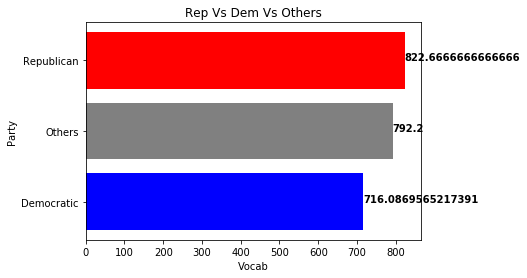

In [8]:
SpeechYearPartyPresident['Vocab']=SpeechYearPartyPresident['Vocab'].astype(int)
print(SpeechYearPartyPresident.groupby('Party')['Vocab'].mean())
PartyVocab=SpeechYearPartyPresident.groupby('Party')['Vocab'].mean().reset_index()
plt.barh(PartyVocab['Party'], PartyVocab['Vocab'], color=['blue', 'grey', 'red'], label=PartyVocab['Vocab'])

plt.xlabel('Vocab')
plt.ylabel('Party')
plt.title('Rep Vs Dem Vs Others')

for index, value in enumerate(PartyVocab['Vocab']):
    plt.text(value, index, str(value), fontweight='bold')

<h2> Q2 : Vocabulary of all POTUS (<font color='blue'>Blue</font> : Democrats; <font color='red'>Red</font> : Republican; <font color='grey'>Grey</font> : Others)

Text(0.5, 1.0, 'Vocabulary of U.S Presidents')

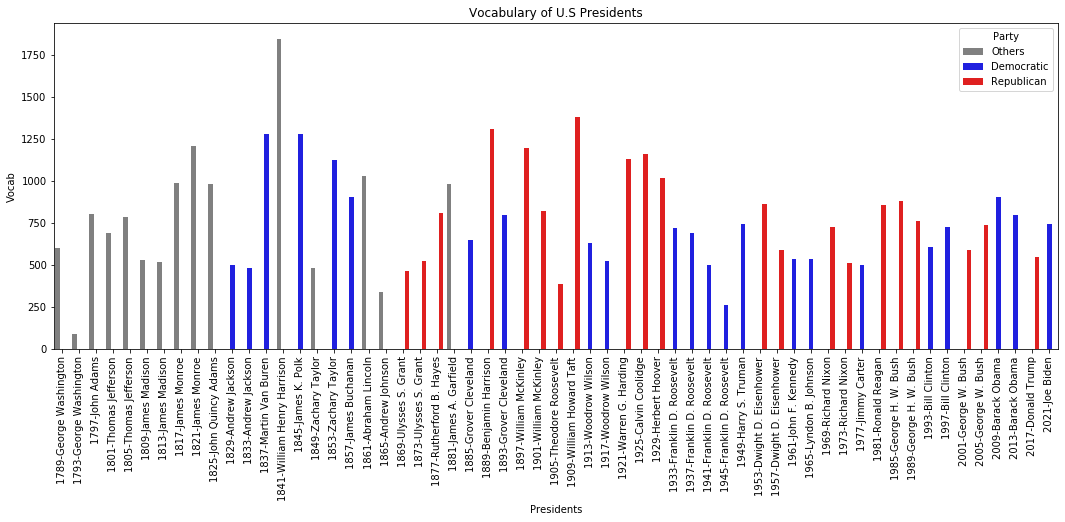

In [9]:
SpeechYearPartyPresident['President_Year']=SpeechYearPartyPresident['Year'].astype(str)+'-'+SpeechYearPartyPresident['President']
palette={"Democratic": "Blue", "Republican": "Red", "Others": "Grey"}
plt.figure(figsize=(18,6))
sb.barplot(x = SpeechYearPartyPresident['President_Year'], y = SpeechYearPartyPresident['Vocab'],hue=SpeechYearPartyPresident['Party'],palette=palette)
plt.xlabel('Presidents')
plt.xticks(rotation=90)
plt.ylabel('Vocab')
plt.title('Vocabulary of U.S Presidents')

<h2> Q3 : Top Five frequent words ? <font color='blue'>Democratic</font> Vs <font color='red'>Republican</font> set of words. 

In [10]:
stop_words = nltk.corpus.stopwords.words('english')
def TopFive(speech):
    #AllSpeech=speeches_df_Year_party['Speech'][i].strip().lower()
    AllSpeech=speech.strip().lower()
    AllSpeechList=AllSpeech.split()
    AllSpeechList = [re.sub(r'[:!?\.,-]+', '', h) for h in AllSpeechList]
    AllSpeechList = [w for w in AllSpeechList if w not in stop_words]
    AllSpeechList = [w for w in AllSpeechList if len(w)>1]
    AllSpeechList_FD = FreqDist(AllSpeechList)
    AllSpeechList_FD_List = []
    for key, value in AllSpeechList_FD.items():
        if value !='':
            AllSpeechList_FD_List.append((value, key))
    AllSpeechList_FD_List.sort(reverse=True)
    top_five = AllSpeechList_FD_List[0:5]
    values, Words = zip(*top_five)
    return Words

In [11]:
SpeechYearPartyPresident['Top Five']=''
for i in SpeechYearPartyPresident.index:
    SpeechYearPartyPresident['Top Five'][i] = TopFive(SpeechYearPartyPresident['Speech'][i])

## Top Five Words : [GW --> BIDEN]

In [27]:
SpeechYearPartyPresident[['Top Five', 'President']]

,Top Five,President
0,"(every, government, public, may, present)",George Washington
1,"(shall, oath, witnesses, willingly, voice)",George Washington
2,"(people, government, may, nations, states)",John Adams
3,"(government, us, may, let, would)",Thomas Jefferson
4,"(public, may, citizens, state, fellow)",Thomas Jefferson
5,"(public, nations, well, states, rights)",James Madison
6,"(war, united, every, country, british)",James Madison
7,"(great, government, states, us, people)",James Monroe
8,"(great, states, would, war, united)",James Monroe
9,"(union, upon, government, rights, public)",John Quincy Adams


<h2> Top Five Words : <font color='blue'>Democratic</font> Vs <font color='red'>Republican</font> Vs <font color='grey'>Others</font>

In [22]:
## creating 3 buckets to create speech corpus by party
SpeechRepublican = ''
SpeechDemocratic = ''
SpeechOther = ''
for i in SpeechYearPartyPresident.index:
    if 'Democratic' in SpeechYearPartyPresident['Party'][i]:
        SpeechDemocratic = SpeechDemocratic + SpeechYearPartyPresident['Speech'][i].strip().lower()
    elif 'Republican' in SpeechYearPartyPresident['Party'][i]:
        SpeechRepublican = SpeechRepublican + SpeechYearPartyPresident['Speech'][i].strip().lower()
    else:
        SpeechOther = SpeechOther + SpeechYearPartyPresident['Speech'][i].strip().lower()
SpeechParty = pd.DataFrame({'Speech': [SpeechDemocratic, SpeechRepublican, SpeechOther], 'Party': ['Democratic', 'Republican', 'Other']})

In [21]:
## now let's just call the TopFive function on SpeechParty
SpeechParty['Top Five Words']=''
for i in SpeechParty.index:
    SpeechParty['Top Five Words'][i]=TopFive(SpeechParty['Speech'][i])
SpeechParty[['Top Five Words','Party']]

,Top Five Words,Party
0,"(us, people, government, must, nation)",Democratic
1,"(people, us, government, must, world)",Republican
2,"(government, people, may, states, great)",Other


## to dig a step deep, PEOPLE, GOVERNMENT are the 2 words common in all 3 parties top 5 words

<h2> Q4 : Key themes in inaugural speeches?

In [57]:
#creating my_docs list which will hold 59 inagural speeches
my_docs = []
for i in SpeechYearPartyPresident.index:
    my_docs.append(SpeechYearPartyPresident['Speech'][i])
len(my_docs)

59

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec = TfidfVectorizer(stop_words='english', max_df=0.85)
tfidf = vec.fit_transform(my_docs)
tfidf.shape  #59 speeches and 8965 words

(59, 8965)

In [62]:
print(vec.vocabulary_) # words and their ID

{'want': 8716, 'thank': 8003, 'predecessor': 6023, 'heal': 3836, 'land': 4671, 'outward': 5599, 'physical': 5851, 'ceremony': 1231, 'attest': 717, 'inner': 4329, 'spiritual': 7500, 'strength': 7642, 'high': 3897, 'school': 7071, 'teacher': 7928, 'miss': 5169, 'julia': 4600, 'coleman': 1402, 'used': 8552, 'say': 7052, 'adjust': 221, 'changing': 1253, 'times': 8077, 'hold': 3917, 'unchanging': 8309, 'principles': 6122, 'bible': 920, 'inauguration': 4150, 'president': 6077, '1789': 15, 'just': 4609, 'taken': 7896, 'oath': 5405, 'office': 5482, 'mother': 5240, 'gave': 3591, 'years': 8944, 'ago': 330, 'opened': 5506, 'timeless': 8076, 'admonition': 245, 'ancient': 432, 'prophet': 6235, 'micah': 5107, 'hath': 3820, 'showed': 7277, 'thee': 8007, 'man': 4955, 'good': 3651, 'doth': 2565, 'lord': 4872, 'require': 6735, 'justly': 4617, 'love': 4883, 'mercy': 5087, 'walk': 8709, 'humbly': 3975, 'thy': 8066, 'god': 3642, 'marks': 5001, 'new': 5355, 'beginning': 864, 'dedication': 2062, 'spirit': 74

In [63]:
print(sorted(vec.vocabulary_.keys())) #the numbers in the start indicate historical references, so I'm keeping them

['000', '100', '108', '11', '120', '125', '13', '14th', '15th', '16', '1774', '1776', '1778', '1780', '1787', '1789', '1790', '1800', '1801', '1812', '1815', '1816', '1817', '1818', '1826', '1850', '1861', '1863', '1868', '1873', '1880', '1886', '1890', '1893', '1896', '1897', '1898', '1899', '18th', '1907', '1917', '1933', '1941', '1945', '1963', '1972', '1980', '1984', '19th', '20', '200', '200th', '2017', '20th', '21st', '225', '25', '30', '30th', '3d', '40', '400', '41', '48', '4th', '50', '50th', '60', '67', '6th', 'abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abodes', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract'

### sklearn: LSI (TruncatedSVD)

In [65]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5)    # 5 topics to start with
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=42)
svd_model.fit(tfidf)
svd_model.components_

array([[ 0.01540514,  0.00260832,  0.00155841, ...,  0.00662899,
         0.00730272,  0.00170726],
       [-0.01206919,  0.00241474,  0.00420163, ..., -0.0117587 ,
        -0.01065697, -0.00311165],
       [ 0.00447713,  0.00059028, -0.00475956, ..., -0.00369672,
        -0.00712322, -0.00286507],
       [ 0.01262984, -0.0009461 ,  0.00353608, ...,  0.00186999,
        -0.00700935, -0.00351267],
       [ 0.02989637,  0.01215193, -0.00385764, ..., -0.00611258,
        -0.01705645,  0.00045037]])

In [67]:
terms = vec.get_feature_names()

In [68]:
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]
    out = "Topic " + str(i) + ": "
    for t in sorted_terms:
        out = out + t[0] + " "
    print(out)

Topic 0: america states peace public new freedom union 
Topic 1: america new today americans freedom let know 
Topic 2: business peoples economic conditions industrial men international 
Topic 3: america congress business american laws constitution tariff 
Topic 4: union war let man states help south 


### sklearn: LDA

In [69]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_model = LDA(n_components=5)
lda_model.fit(tfidf)
vec.get_feature_names()

['000',
 '100',
 '108',
 '11',
 '120',
 '125',
 '13',
 '14th',
 '15th',
 '16',
 '1774',
 '1776',
 '1778',
 '1780',
 '1787',
 '1789',
 '1790',
 '1800',
 '1801',
 '1812',
 '1815',
 '1816',
 '1817',
 '1818',
 '1826',
 '1850',
 '1861',
 '1863',
 '1868',
 '1873',
 '1880',
 '1886',
 '1890',
 '1893',
 '1896',
 '1897',
 '1898',
 '1899',
 '18th',
 '1907',
 '1917',
 '1933',
 '1941',
 '1945',
 '1963',
 '1972',
 '1980',
 '1984',
 '19th',
 '20',
 '200',
 '200th',
 '2017',
 '20th',
 '21st',
 '225',
 '25',
 '30',
 '30th',
 '3d',
 '40',
 '400',
 '41',
 '48',
 '4th',
 '50',
 '50th',
 '60',
 '67',
 '6th',
 'abandon',
 'abandoned',
 'abandonment',
 'abate',
 'abdicated',
 'abeyance',
 'abhorring',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abnormal',
 'abode',
 'abodes',
 'abolish',
 'abolished',
 'abolishing',
 'aboriginal',
 'aborigines',
 'abound',
 'abounding',
 'abounds',
 'abraham',
 'abreast',
 'abridging',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolu

In [70]:
lda_model.components_

array([[0.20000394, 0.20000816, 0.20000715, ..., 0.20000591, 0.20000577,
        0.20000558],
       [0.53442953, 0.26528409, 0.23637814, ..., 0.3467397 , 0.3733243 ,
        0.23335063],
       [0.20000394, 0.20000816, 0.20000715, ..., 0.20000591, 0.20000577,
        0.20000558],
       [0.20000394, 0.20000816, 0.20000715, ..., 0.20000591, 0.20000577,
        0.20000558],
       [0.20000394, 0.20000816, 0.20000715, ..., 0.20000591, 0.20000577,
        0.20000558]])

In [71]:
lda_output = lda_model.transform(tfidf)
lda_output                                  # 59 documents as rows; 5 topics as columns

array([[0.01097548, 0.9560981 , 0.01097548, 0.01097548, 0.01097548],
       [0.00958179, 0.96167282, 0.00958179, 0.00958179, 0.00958179],
       [0.01003945, 0.9598422 , 0.01003945, 0.01003945, 0.01003945],
       [0.00969754, 0.96120982, 0.00969754, 0.00969754, 0.00969754],
       [0.00822264, 0.96710945, 0.00822264, 0.00822264, 0.00822264],
       [0.00839909, 0.96640363, 0.00839909, 0.00839909, 0.00839909],
       [0.00853404, 0.96586383, 0.00853404, 0.00853404, 0.00853404],
       [0.01282771, 0.94868917, 0.01282771, 0.01282771, 0.01282771],
       [0.00941898, 0.96232407, 0.00941898, 0.00941898, 0.00941898],
       [0.00953445, 0.9618622 , 0.00953445, 0.00953445, 0.00953445],
       [0.01044446, 0.95822215, 0.01044446, 0.01044446, 0.01044446],
       [0.01136043, 0.95455826, 0.01136043, 0.01136043, 0.01136043],
       [0.01251846, 0.94992616, 0.01251846, 0.01251846, 0.01251846],
       [0.00837556, 0.96649777, 0.00837556, 0.00837556, 0.00837556],
       [0.0105779 , 0.95768839, 0.

In [72]:
print("Log Likelihood: ", lda_model.score(tfidf))
print("Perplexity: ", lda_model.perplexity(tfidf)) 
#looks like really bad numbers, let's tweek the hyperparameters, will change no of topics to start with

Log Likelihood:  -13884.135311057518
Perplexity:  72448.68499157425


### Gensim: TD-IDF

In [74]:
#!pip install gensim
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [75]:
tokens = []
for doc in my_docs:
    words = regexp_tokenize(doc.lower(), r'[A-Za-z]+')
    words = [w for w in words if w not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(w) for w in words]
    tokens.append(words)
tokens

[['nation',
  'want',
  'thank',
  'predecessor',
  'done',
  'heal',
  'land',
  'outward',
  'physical',
  'ceremony',
  'attest',
  'inner',
  'spiritual',
  'strength',
  'nation',
  'high',
  'school',
  'teacher',
  'miss',
  'julia',
  'coleman',
  'used',
  'say',
  'must',
  'adjust',
  'changing',
  'time',
  'still',
  'hold',
  'unchanging',
  'principle',
  'bible',
  'used',
  'inauguration',
  'first',
  'president',
  'taken',
  'oath',
  'office',
  'bible',
  'mother',
  'gave',
  'year',
  'ago',
  'opened',
  'timeless',
  'admonition',
  'ancient',
  'prophet',
  'micah',
  'hath',
  'showed',
  'thee',
  'man',
  'good',
  'doth',
  'lord',
  'require',
  'thee',
  'justly',
  'love',
  'mercy',
  'walk',
  'humbly',
  'thy',
  'god',
  'micah',
  'inauguration',
  'ceremony',
  'mark',
  'new',
  'beginning',
  'new',
  'dedication',
  'within',
  'government',
  'new',
  'spirit',
  'among',
  'u',
  'president',
  'may',
  'sense',
  'proclaim',
  'new',
  'spi

In [78]:
from gensim.corpora import Dictionary
my_dict = Dictionary(tokens)  
print(my_dict)
my_dict.token2id
dtm = [my_dict.doc2bow(doc) for doc in tokens]

Dictionary(7980 unique tokens: ['abiding', 'able', 'abroad', 'absolute', 'accomplishment']...)


In [79]:
from gensim.models import TfidfModel
tfidf = TfidfModel(dtm)

In [81]:
from gensim.models import LsiModel, CoherenceModel
lsi_model = LsiModel(corpus=dtm, id2word=my_dict, num_topics=5)
lsi_model.print_topics(num_topics=5, num_words=5)

[(0,
  '0.296*"government" + 0.258*"people" + 0.225*"state" + 0.182*"power" + 0.178*"upon"'),
 (1,
  '-0.321*"u" + -0.280*"world" + -0.248*"america" + 0.238*"state" + -0.216*"nation"'),
 (2,
  '0.296*"power" + -0.278*"law" + 0.186*"u" + -0.150*"business" + 0.148*"citizen"'),
 (3,
  '-0.253*"union" + -0.229*"state" + 0.214*"upon" + -0.147*"war" + 0.146*"business"'),
 (4,
  '-0.300*"people" + -0.218*"upon" + 0.178*"u" + -0.140*"world" + -0.132*"nation"')]

### Let's find out optimal number of topics

In [85]:
coherence_values = []
lsi_model_list = []
min_topics, max_topics, step = 1, 6, 1
for i in range(min_topics, max_topics, step):
    lsi_model = LsiModel(dtm, id2word=my_dict, num_topics=i)
    lsi_model_list.append(lsi_model)
    coherencemodel = CoherenceModel(model=lsi_model, texts=tokens, \
        dictionary=my_dict, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

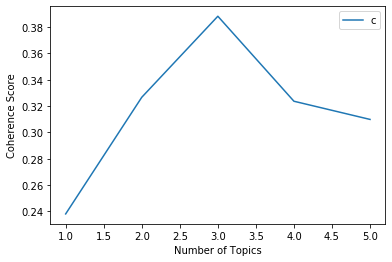

In [86]:
x = range(min_topics, max_topics, step)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show() # 3 topics looks ideal

### Gensim: LDA

In [88]:
from gensim.models import LdaModel, LdaMulticore
lda_model = LdaModel(dtm, num_topics=3, id2word=my_dict, passes=10)
lda_model.print_topics(num_topics=3, num_words=5)

[(0,
  '0.012*"government" + 0.010*"state" + 0.009*"people" + 0.007*"upon" + 0.006*"power"'),
 (1,
  '0.011*"u" + 0.011*"nation" + 0.010*"world" + 0.009*"people" + 0.008*"must"'),
 (2,
  '0.006*"u" + 0.005*"people" + 0.004*"nation" + 0.004*"great" + 0.003*"life"')]

In [90]:
# Evaluation
goodLdaModel = LdaModel(corpus=dtm, id2word=my_dict, iterations=50, num_topics=2)
badLdaModel = LdaModel(corpus=dtm, id2word=my_dict, iterations=1, num_topics=2)
goodcm = CoherenceModel(model=goodLdaModel, corpus=dtm, dictionary=my_dict, coherence='u_mass')
badcm  = CoherenceModel(model=badLdaModel, corpus=dtm, dictionary=my_dict, coherence='u_mass')
print(goodcm.get_coherence())
print(badcm.get_coherence())  #no great difference

-0.11958783931874788
-0.1443070163750921


In [91]:
#Visualizing the topics

#!pip install pyLDAvis  
import pyLDAvis.gensim              
pyLDAvis.enable_notebook()

C:\Users\samrat\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [92]:
vis = pyLDAvis.gensim.prepare(lda_model, dtm, my_dict)
pyLDAvis.display(vis)

<h2> Q5 : Sentiment analysis (positive/negative) scores for each POTUS

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
SpeechYearPartyPresident['Compound'] = ''
SpeechYearPartyPresident['Pos'] = ''
SpeechYearPartyPresident['Neg'] = ''

for i in SpeechYearPartyPresident.index:
    SpeechYearPartyPresident['Compound'][i] = analyzer.polarity_scores(SpeechYearPartyPresident['Speech'][i].strip().lower())['compound']
    SpeechYearPartyPresident['Pos'][i] = analyzer.polarity_scores(SpeechYearPartyPresident['Speech'][i].strip().lower())['pos']
    SpeechYearPartyPresident['Neg'][i] = analyzer.polarity_scores(SpeechYearPartyPresident['Speech'][i].strip().lower())['neg']
SpeechYearPartyPresident

,Speech,Year,Party,President,Vocab,President_Year,Top Five,Compound,pos,neg,Pos,Neg
0,Fellow-Citizens of the Senate and of the House...,1789,Others,George Washington,601,1789-George Washington,"(every, government, public, may, present)",0.9999,0.239,0.05,0.239,0.05
1,"Fellow citizens, I am again called upon by the...",1793,Others,George Washington,90,1793-George Washington,"(shall, oath, witnesses, willingly, voice)",0.7845,0.083,0.034,0.083,0.034
2,"When it was first perceived, in early times, t...",1797,Others,John Adams,804,1797-John Adams,"(people, government, may, nations, states)",1,0.258,0.049,0.258,0.049
3,Friends and Fellow Citizens:\n\nCalled upon to...,1801,Others,Thomas Jefferson,692,1801-Thomas Jefferson,"(government, us, may, let, would)",0.9998,0.22,0.081,0.22,0.081
4,"Proceeding, fellow citizens, to that qualifica...",1805,Others,Thomas Jefferson,786,1805-Thomas Jefferson,"(public, may, citizens, state, fellow)",0.9998,0.177,0.056,0.177,0.056
5,Unwilling to depart from examples of the most ...,1809,Others,James Madison,528,1809-James Madison,"(public, nations, well, states, rights)",0.9991,0.177,0.049,0.177,0.049
6,About to add the solemnity of an oath to the o...,1813,Others,James Madison,518,1813-James Madison,"(war, united, every, country, british)",0.9764,0.151,0.129,0.151,0.129
7,I should be destitute of feeling if I was not ...,1817,Others,James Monroe,989,1817-James Monroe,"(great, government, states, us, people)",1,0.217,0.056,0.217,0.056
8,"Fellow citizens, I shall not attempt to descri...",1821,Others,James Monroe,1208,1821-James Monroe,"(great, states, would, war, united)",1,0.191,0.065,0.191,0.065
9,In compliance with an usage coeval with the ex...,1825,Others,John Quincy Adams,980,1825-John Quincy Adams,"(union, upon, government, rights, public)",0.9999,0.203,0.055,0.203,0.055


## Barplots in chronological order

In [33]:
#defination to Sentiment barplot by party and color
def barplot(Party, Color, Mood):
    plt.figure(figsize=(10,5))
    x=SpeechYearPartyPresident[SpeechYearPartyPresident.Party==Party]['President_Year']# X axis
    y=SpeechYearPartyPresident[SpeechYearPartyPresident.Party==Party][Mood]# y-axis
    sb.barplot(x=x, y=y,color=Color) #plot
    plt.xlabel('Presidents (Old ----> New)')
    plt.xticks(rotation=90)
    plt.ylabel(Mood + ' Sentiment')
    plt.title(Mood + ' sentiment of '+ Party + ' Presidents')

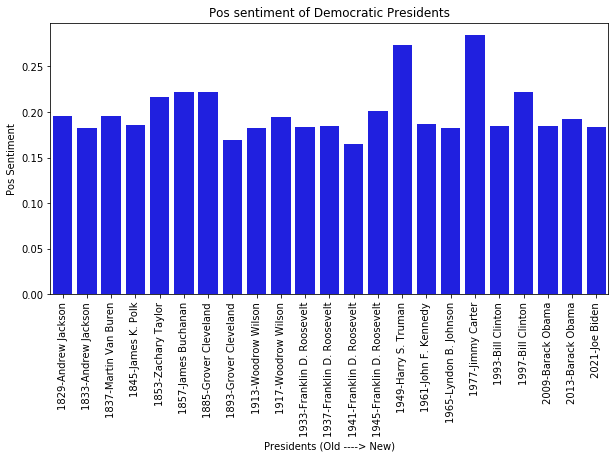

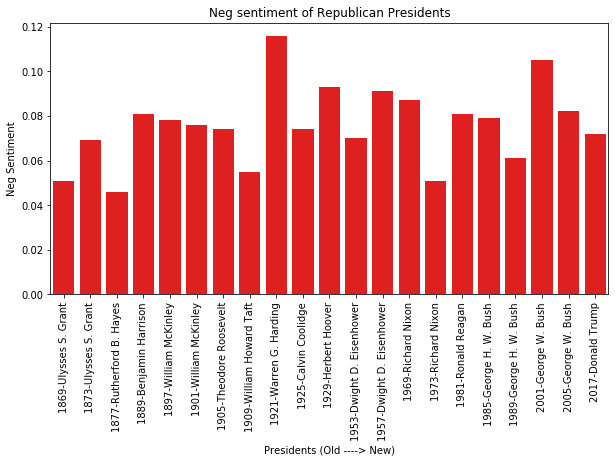

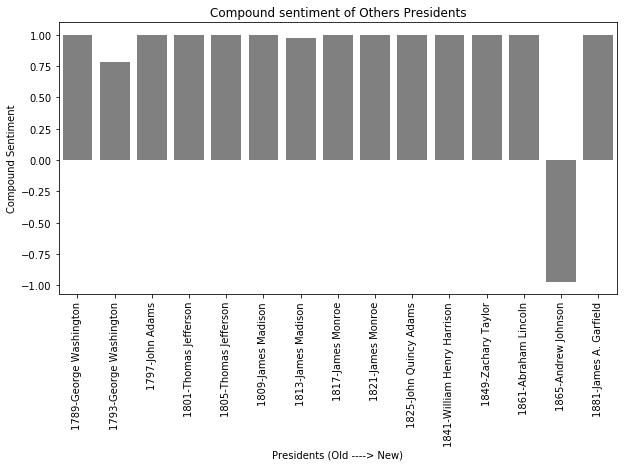

In [34]:
#custom barplot where you can fiddle with mood/party, I've tried three different combinations in 3 calls
barplot('Democratic','Blue', 'Pos')
barplot('Republican','Red', 'Neg')
barplot('Others','Grey', 'Compound')

## mean sentiment scores

In [46]:
#mean sentiment score group by party - Pos
SpeechYearPartyPresident['Pos'] = SpeechYearPartyPresident['Pos'].astype(float)
SpeechYearPartyPresident.groupby('Party')['Pos'].mean()

Party
Democratic    0.199870
Others        0.186733
Republican    0.225333
Name: Pos, dtype: float64

## Republicans positive mean score is higher

In [47]:
#mean sentiment score group by party - Neg
SpeechYearPartyPresident['Neg'] = SpeechYearPartyPresident['Neg'].astype(float)
SpeechYearPartyPresident.groupby('Party')['Neg'].mean()

Party
Democratic    0.079391
Others        0.071933
Republican    0.075810
Name: Neg, dtype: float64

## Democrats negative mean score is higher

In [48]:
#mean sentiment score group by party - Compound 
SpeechYearPartyPresident['Compound'] = SpeechYearPartyPresident['Compound'].astype(float)
SpeechYearPartyPresident.groupby('Party')['Compound'].mean()

Party
Democratic    0.999609
Others        0.852413
Republican    0.999876
Name: Compound, dtype: float64

## Republican Compound mean score is higher 

## Top 3 +ve sentiment in each group

In [49]:
#Pos
SpeechYearPartyPresident=SpeechYearPartyPresident.sort_values(['pos'], ascending=False)
SpeechYearPartyPresident.groupby('Party')['Party','President','pos'].head(3).sort_values(['Party'])

,Party,President,pos
47,Democratic,Jimmy Carter,0.284
40,Democratic,Harry S. Truman,0.273
52,Democratic,Bill Clinton,0.222
2,Others,John Adams,0.258
0,Others,George Washington,0.239
15,Others,Zachary Taylor,0.237
42,Republican,Dwight D. Eisenhower,0.27
54,Republican,George W. Bush,0.269
41,Republican,Dwight D. Eisenhower,0.261


# <center> Thank You <center/>